In [ ]:


!git clone https://github.com/rslim087a/track 

fatal: destination path 'track' already exists and is not an empty directory.


In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras as kr
print(kr.__version__)

2.4.0
2.4.3


In [ ]:
!pip install imgaug



In [ ]:
!ls track

driving_log.csv  IMG


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [ ]:
datadir='track'
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)
data.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  ...     speed
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg  ...  0.649786
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg  ...  0.627942
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg  ...  0.622910
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg  ...  0.619162
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg  ...  0.615438

[5 rows x 7 columns]

In [ ]:
#remove the extra path
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head(5)

center  ...     speed
0  center_2018_07_16_17_11_43_382.jpg  ...  0.649786
1  center_2018_07_16_17_11_43_670.jpg  ...  0.627942
2  center_2018_07_16_17_11_43_724.jpg  ...  0.622910
3  center_2018_07_16_17_11_43_792.jpg  ...  0.619162
4  center_2018_07_16_17_11_43_860.jpg  ...  0.615438

[5 rows x 7 columns]

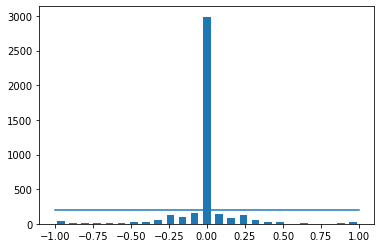

In [ ]:
#distribution of the steering
num_bins=25
samples_per_bin=400
hist,bins=np.histogram(data['steering'],num_bins)
center=(bins[:-1]+bins[1:])*0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

total data 4053
removed 2790
1263


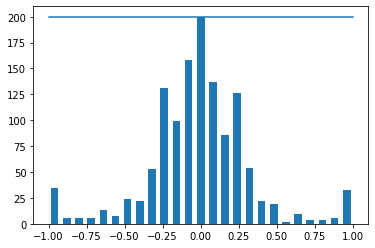

In [ ]:
#must flatten our data otherwise it will go maximum stratghtline
remove_list=[]
print('total data',len(data))
for j in range(num_bins):
  list_=[]
  for i in range(len(data['steering'])):
    if data['steering'][i]>= bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed',len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print(len(data))

hist,_=np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

In [ ]:
print(data.iloc[1])
def load_img_steering(datadir,df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  return image_paths,steerings
image_paths,steerings=load_img_steering(datadir+'/IMG',data)

center      center_2018_07_16_17_11_44_413.jpg
left        left_2018_07_16_17_11_44_413.jpg  
right       right_2018_07_16_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0                                 
speed       1.43401                           
Name: 12, dtype: object


In [ ]:
X_train,X_valid,y_train,y_valid=train_test_split(image_paths,steerings,test_size=0.2,random_state=0)
print(len(X_train))
print(len(X_valid))

1010
253


Text(0.5, 1.0, 'Validation Set')

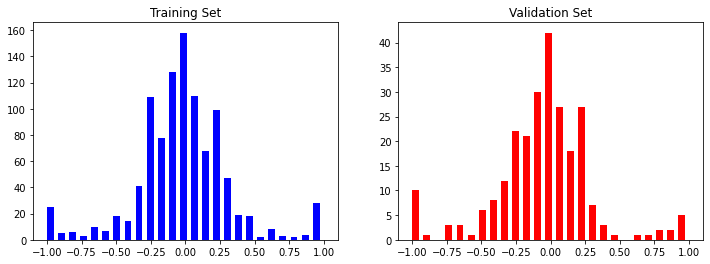

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training Set')
axes[1].hist(y_valid,bins=num_bins,width=0.05,color='red')
axes[1].set_title('Validation Set')

In [ ]:
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.3))
  image=zoom.augment_image(image)
  return image
image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
zoomed_image=zoom(original_image)

Text(0.5, 1.0, 'Zoomed Image Image')

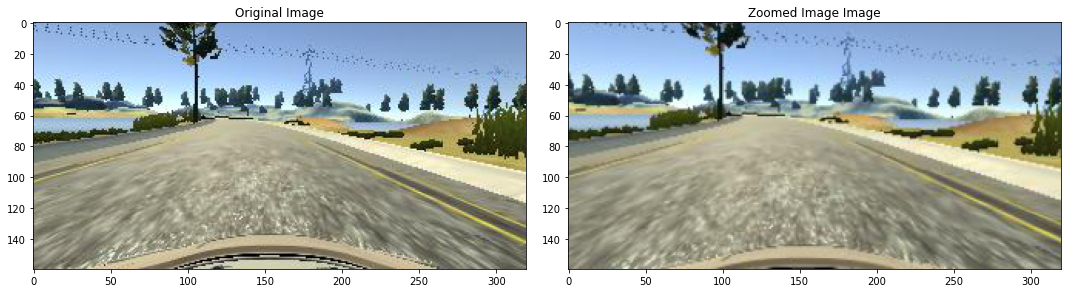

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Image')

In [ ]:
def pan(image):
  pan=iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  image=pan.augment_image(image)
  return image

image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
panned_image=pan(original_image)

Text(0.5, 1.0, 'Panned Image')

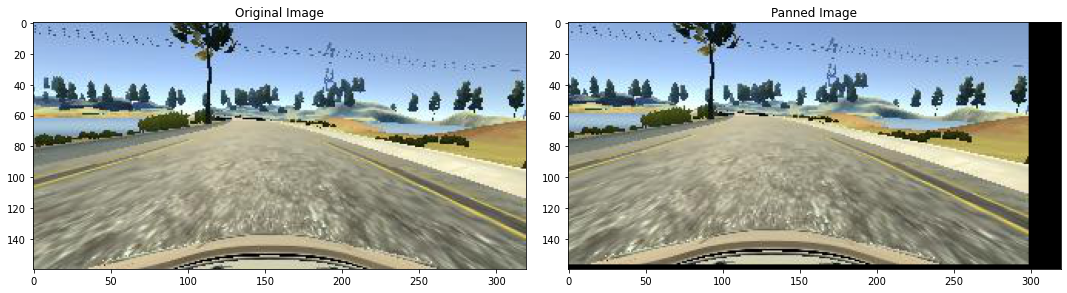

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [ ]:
def img_random_brightness(image):
  brightness=iaa.Multiply((0.2,1.2))
  image=brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Brightness Altered Image')

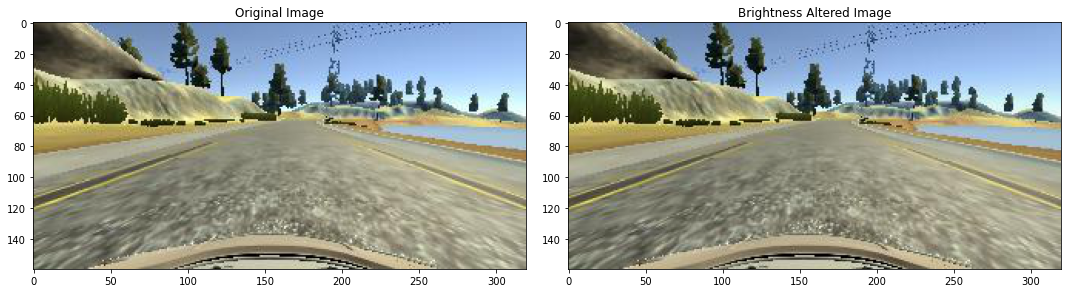

In [ ]:
image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
brightness_altered_image=img_random_brightness(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness Altered Image')

In [ ]:
def img_random_flip(image,steering_angle):
  image=cv2.flip(image,1)
  steering_angle= -steering_angle
  return image,steering_angle


Text(0.5, 1.0, 'Flipped Image')

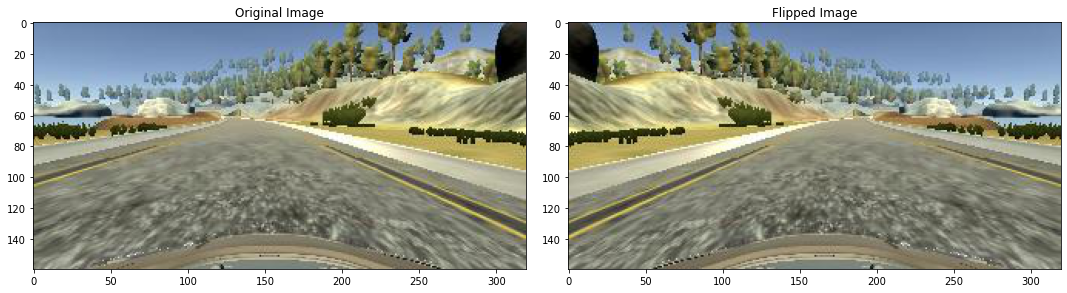

In [ ]:
random_index=random.randint(0,1000)
image=image_paths[random_index]
steering_angle=steerings[random_index]

original_image=mpimg.imread(image)
flipped_image,flipped_steering_angle=img_random_flip(original_image,steering_angle)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image')

In [ ]:
def random_augment(image,steering_angle):
  image=mpimg.imread(image)
  if np.random.rand()<0.5:
    image=pan(image)
  if np.random.rand()<0.5:
    image=zoom(image)
  if np.random.rand()<0.5:
    image=img_random_brightness(image)
  if np.random.rand()<0.5:
    image,steering_angle=img_random_flip(image,steering_angle)
  return image,steering_angle

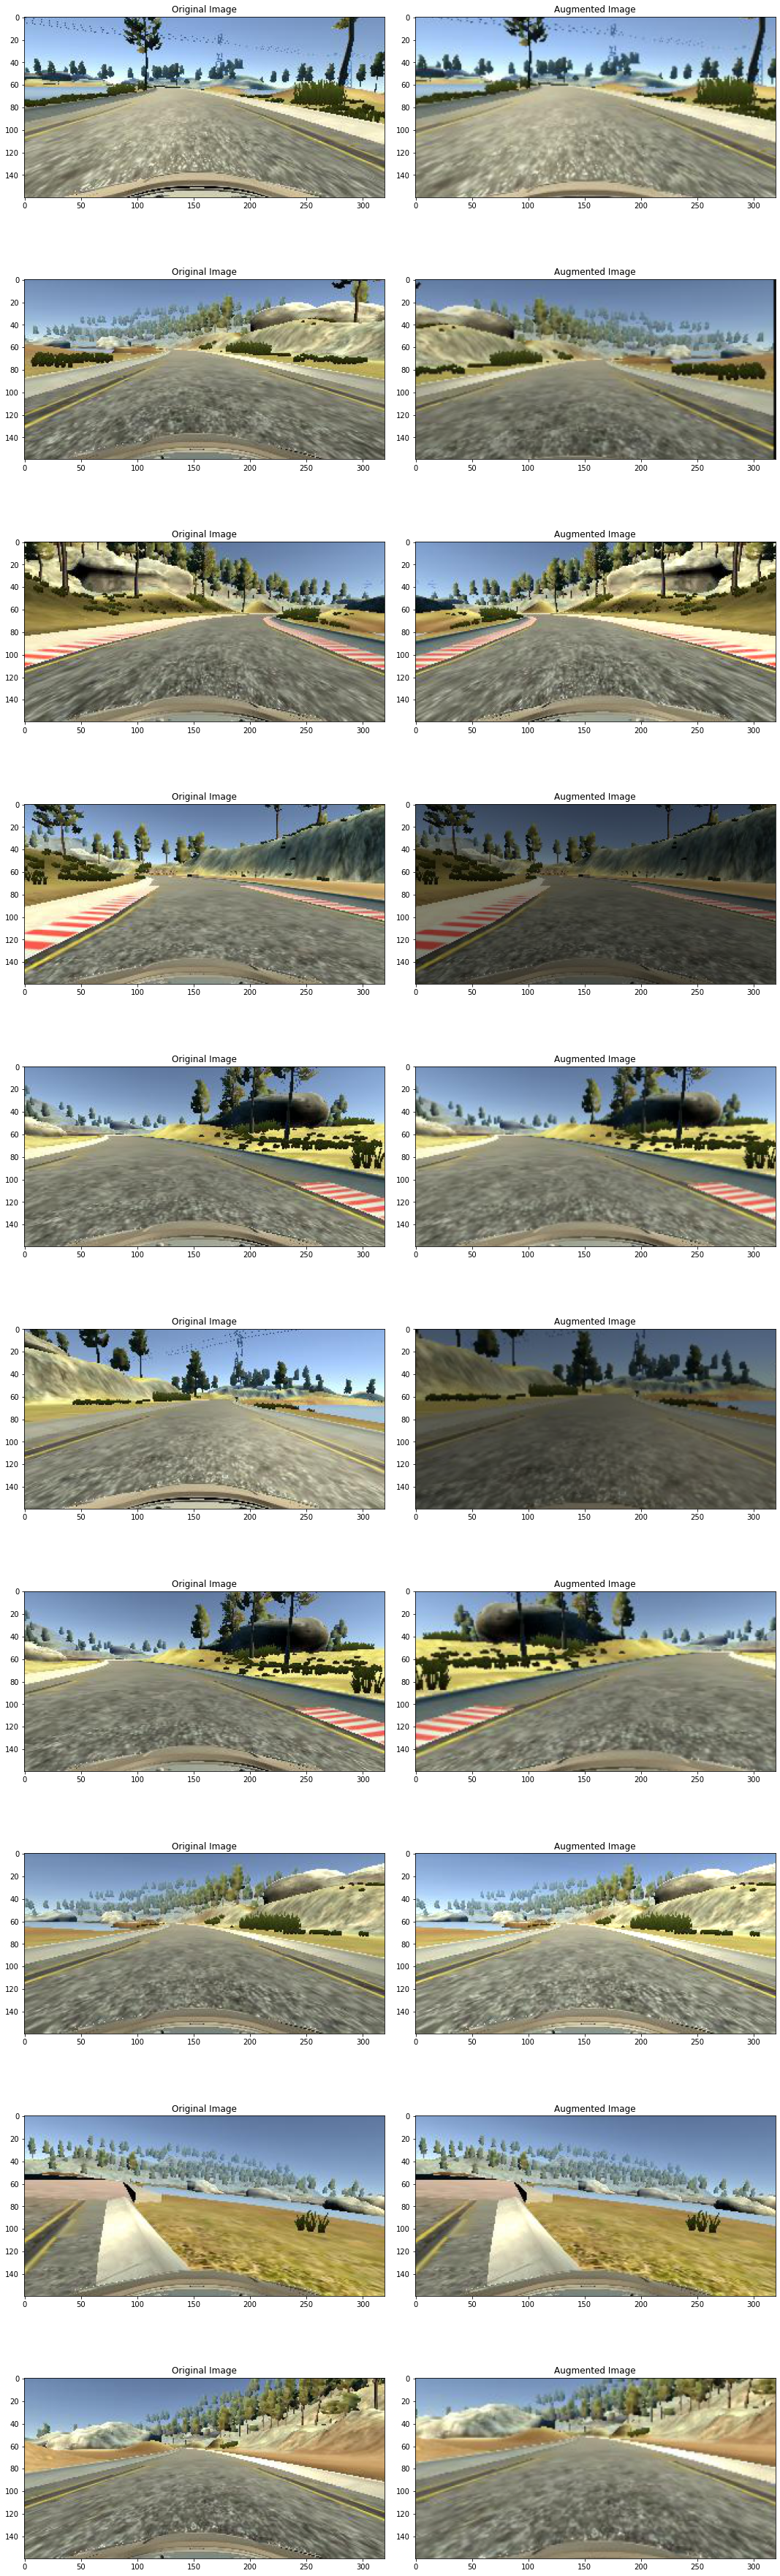

In [ ]:
ncol=2
nrow=10
fig,axs=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout() #not overlap
for i in range(10):
  randnum=random.randint(0,len(image_paths)-1)
  random_image=image_paths[randnum]
  random_steering=steerings[randnum]
  original_image=mpimg.imread(random_image)
  augmented_image,steering=random_augment(random_image,random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title('Original Image')

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title('Augmented Image')

In [ ]:
def img_preprocess(img):
  #img=mpimg.imread(img)
  img=img[60:135,:,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV) #convert the Y the limusity and UV is the chromium
  img=cv2.GaussianBlur(img, (3,3),0)
  img=cv2.resize(img, (200,66))
  img=img/255 #normalize the image
  return img

Text(0.5, 1.0, 'Preprocessed Image')

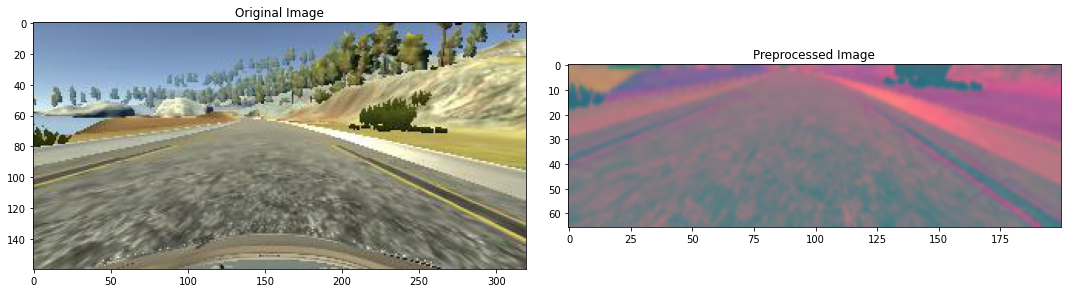

In [ ]:
image=image_paths[100]
original_image=mpimg.imread(image)
preprocessed_image=img_preprocess(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

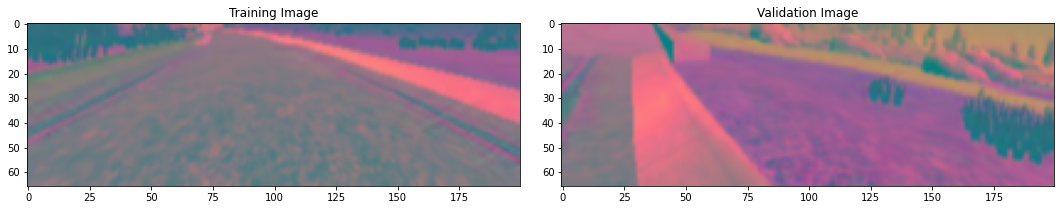

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [ ]:
#X_train=np.array(list(map(img_preprocess,X_train)))
#X_valid=np.array(list(map(img_preprocess,X_valid)))

In [ ]:
#we select nvidia model
def nvidia_model():
  model=Sequential()
  model.add(Conv2D(24,5,2,input_shape=(66,200,3),activation='sigmoid'))
  model.add(Conv2D(36,5,2,activation='elu'))
  model.add(Conv2D(48,5,2,activation='elu'))
  model.add(Conv2D(64,3,activation='elu'))
  
  model.add(Conv2D(64,3,activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(100,activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(50,activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(10,activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  optimizer=Adam(lr=1e-4)
  model.compile(loss='mse',optimizer=optimizer)
  return model

In [ ]:
model=nvidia_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [ ]:
history=model.fit_generator(batch_generator(X_train,y_train,100,1),steps_per_epoch=300,epochs=10,validation_data=batch_generator(X_valid,y_valid,100,0),validation_steps=200,verbose=1,shuffle=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
300/300 [==============================] - 171s 570ms/step - loss: 0.1256 - val_loss: 0.1245
Epoch 2/10
300/300 [==============================] - 170s 567ms/step - loss: 0.1089 - val_loss: 0.0700
Epoch 3/10
300/300 [==============================] - 171s 573ms/step - loss: 0.0758 - val_loss: 0.0620
Epoch 4/10
300/300 [==============================] - 169s 566ms/step - loss: 0.0705 - val_loss: 0.0574
Epoch 5/10
300/300 [==============================] - 170s 567ms/step - loss: 0.0632 - val_loss: 0.0565
Epoch 6/10
300/300 [==============================] - 170s 570ms/step - loss: 0.0628 - val_loss: 0.0551
Epoch 7/10
300/300 [==============================] - 170s 570ms/step - loss: 0.0583 - val_loss: 0.0531
Epoch 8/10
300/300 [==============================] - 170s 567ms/step - loss: 0.0577 - val_loss: 0.0495
Epoch 9/10
300/300 [==============================] - 171s 571ms/step - loss: 0.0552 - val_loss: 0.0470
Epoch 10/10
300/300 [==============================] - 171s 570m

Text(0.5, 0, 'Epochs')

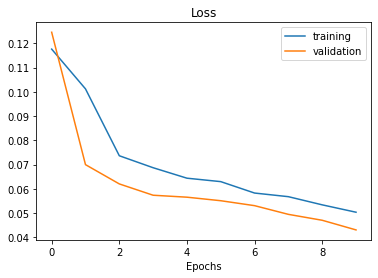

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epochs')

In [ ]:
model.save('model_final.h5')

In [ ]:
from google.colab import files
files.download('model_final.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>